# Astronomical images

1. One of the most widely used formats for astronomical images is the Flexible Image Transport System. In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array.

2. FITS files also have headers which store metadata about the image.

3. FITS files are a standard format and astronomers have developed many libraries (in many programming languages) that can read and write FITS files. We're going to use the Astropy module.

4. The following code shows how we can open a FITS file and print out its header information:

# FITS handling with astropy

In [42]:
import astropy
import matplotlib
import numpy as np

check all packages
conda install -c conda-forge/label/cf202003 aplpy

In [43]:
# Import fits map
from astropy.io import fits
nvss = fits.open('nvss.fits')
nvss

In [44]:
##  print out its header information
nvss.info()

Filename: nvss.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (183, 183, 1, 1)   float32   


In [45]:
#We have only one header so print as name[0]
nvss[0]

In [46]:
# Full header information
nvss[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  183 / length of data axis 1                          
NAXIS2  =                  183 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'No_Name '           / Name of object                                 
TELESCOP= 'VLA     '           / Telescope used                                 
INSTRUME= 'L-BAND  '        

In [47]:
nvss_data = nvss[0].data
nvss_data

array([[[[-1.5899667e-03, -1.5440471e-03, -1.4521204e-03, ...,
          -5.1385585e-05,  7.8861282e-05,  1.7965698e-04],
         [-1.6336972e-03, -1.5792174e-03, -1.4763299e-03, ...,
          -1.2175984e-04,  4.0600149e-05,  1.7146283e-04],
         [-1.6546984e-03, -1.5919828e-03, -1.4762150e-03, ...,
          -2.0282931e-04, -1.3128659e-05,  1.4633354e-04],
         ...,
         [ 5.6323252e-04,  4.2763591e-04,  1.9772307e-04, ...,
          -3.9874396e-04, -4.4731863e-04, -4.8541182e-04],
         [ 5.9139315e-04,  4.6505270e-04,  2.4214356e-04, ...,
          -3.3015062e-04, -3.8969572e-04, -4.3619878e-04],
         [ 6.4271217e-04,  5.2799977e-04,  3.0671759e-04, ...,
          -2.3433294e-04, -3.0595640e-04, -3.6392553e-04]]]],
      dtype=float32)

In [48]:
#Type of data
#In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array.

type(nvss_data)

numpy.ndarray

In [49]:
#Shape of the data
nvss_data.shape

(1, 1, 183, 183)

In [50]:
nvss_data.dtype.name

'float32'

### We can treat the fits data as Numpy array. 
We can calculate minminum, maximum, ,mean and standard deviation values like an Numpy array 

In [51]:
print('Min:', np.min(nvss_data))
print('Max:', np.max(nvss_data))
print('Mean:', np.mean(nvss_data))
print('Stdev:', np.std(nvss_data))

Min: -0.010027932
Max: 2.3779101
Mean: 0.02909539
Stdev: 0.16649677


### Let's try to plot the data using 
1. You often want to visualise the image data stored in FITS files. 
2. We can do this using the plotting library matplotlib. This example creates a 2D plot from the previous FITS image:

```
plt.imshow()
```

In [52]:
plt.imshow(nvss_data)

TypeError: Invalid shape (1, 1, 183, 183) for image data

## Error !
We get an error again see the shape of the data.

```
#Shape of the data
nvss_data.shape
(1, 1, 183, 183)
```

>imshow() 

can plot a 2D data as y and x. But the fits data contain 4 dimension.
We need to reshape the array to a 2 dimensions.

## Reshape

In [53]:
#Reshaping the data
nvss_data_reshape1 = nvss_data.reshape(183,183)
#data_reshape2 = data_reshape1

In [54]:
#plot reshaped data
plt.imshow(nvss_data_reshape1)

### Compate the output with your ds9 image

At this stage open the fits file in ds. You will notice a difference in the both images.
>The image is flipped vertically.

We need to reshape the Numpy array again.

In [55]:
# Reshape using Numpy index.
nvss_data_reshape2 = nvss_data_reshape1[::-1,:]
print(nvss_data_reshape2)

[[ 6.4271217e-04  5.2799977e-04  3.0671759e-04 ... -2.3433294e-04
  -3.0595640e-04 -3.6392553e-04]
 [ 5.9139315e-04  4.6505270e-04  2.4214356e-04 ... -3.3015062e-04
  -3.8969572e-04 -4.3619878e-04]
 [ 5.6323252e-04  4.2763591e-04  1.9772307e-04 ... -3.9874396e-04
  -4.4731863e-04 -4.8541182e-04]
 ...
 [-1.6546984e-03 -1.5919828e-03 -1.4762150e-03 ... -2.0282931e-04
  -1.3128659e-05  1.4633354e-04]
 [-1.6336972e-03 -1.5792174e-03 -1.4763299e-03 ... -1.2175984e-04
   4.0600149e-05  1.7146283e-04]
 [-1.5899667e-03 -1.5440471e-03 -1.4521204e-03 ... -5.1385585e-05
   7.8861282e-05  1.7965698e-04]]


<IPython.core.display.Javascript object>


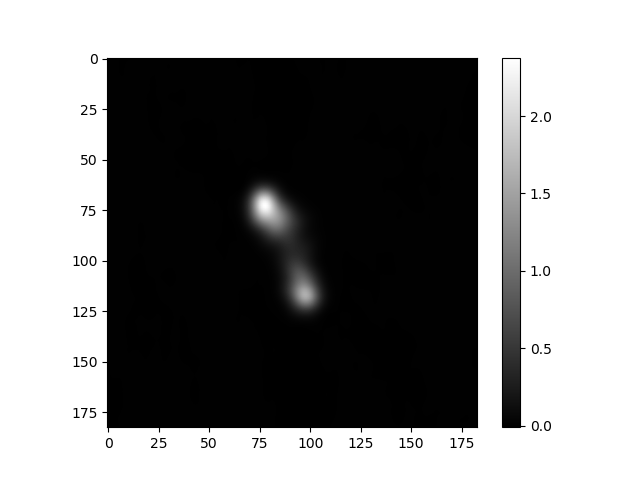

In [57]:
# This image will look same as your ds9 image
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(nvss_data_reshape2, cmap='gray',interpolation='bilinear')
plt.colorbar()

<IPython.core.display.Javascript object>


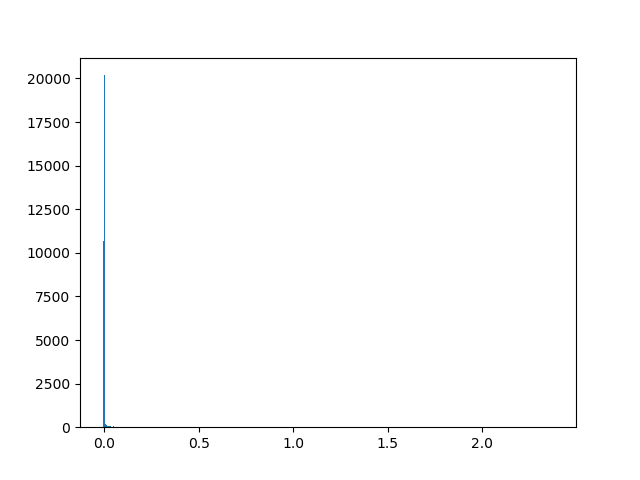

In [58]:
#To image with proper dynamic range lets see the flux distribution around which value.
histogram = plt.hist(nvss_data_reshape2.flat, bins=500)

<IPython.core.display.Javascript object>


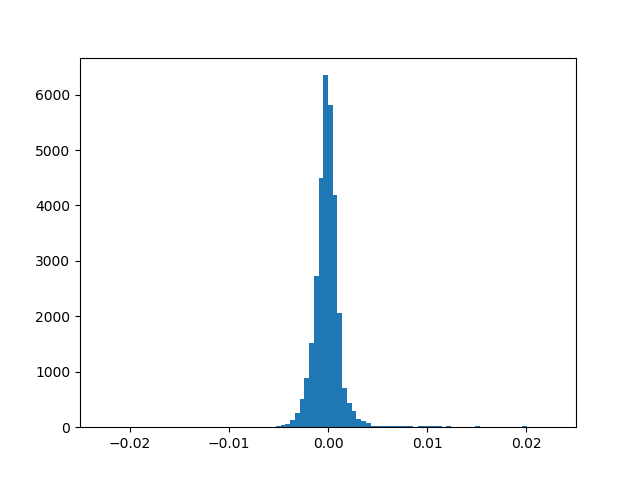

In [59]:
#We can see most values distributed around 0
plt.xlim(-0.025,0.025)
histogram = plt.hist(nvss_data_reshape2.flat, bins=5000)

Why ?
what are the negative values?


In [60]:
import numpy as np
rms_nvss = 0.45E-3
levs = [3, 6, 12, 24, 48, 96.00, 192.00, 384.00, 768, 1536, 3072, 6144, 12288, 15000, 17500]
levs_np = np.array(levs)
levs_np = rms_nvss*levs_np
levs_np

array([1.3500e-03, 2.7000e-03, 5.4000e-03, 1.0800e-02, 2.1600e-02,
       4.3200e-02, 8.6400e-02, 1.7280e-01, 3.4560e-01, 6.9120e-01,
       1.3824e+00, 2.7648e+00, 5.5296e+00, 6.7500e+00, 7.8750e+00])

<IPython.core.display.Javascript object>


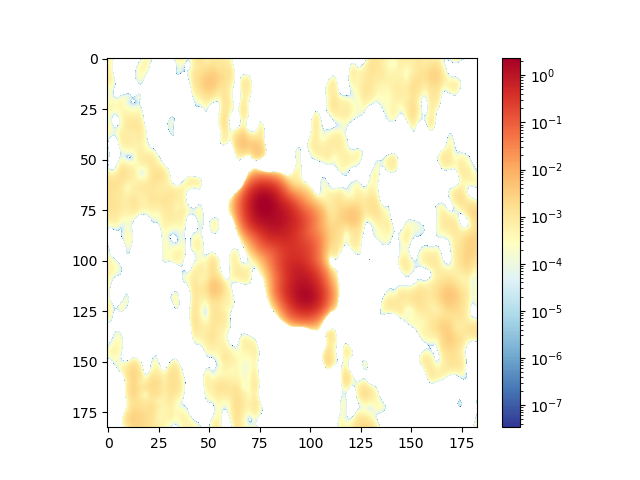

In [61]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(nvss_data_reshape2, cmap='RdYlBu_r', norm=LogNorm(),interpolation='bilinear')
#plt.contour(data_reshape1, levs_np, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('nvss_colorscale.png')

<IPython.core.display.Javascript object>


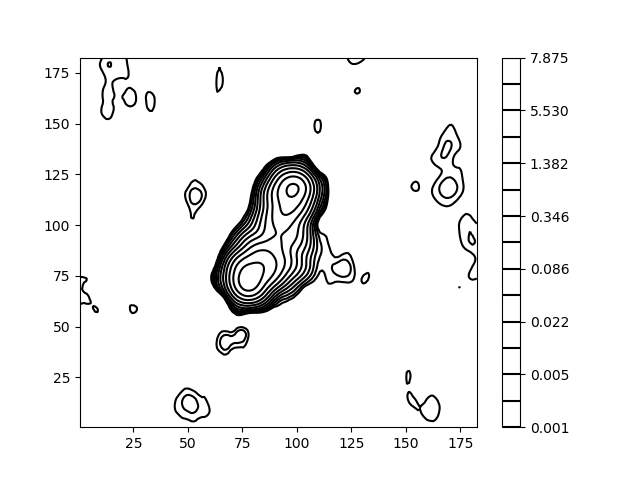

In [62]:
from matplotlib.colors import LogNorm
from matplotlib import cm

#plt.imshow(data_reshape2, cmap='RdYlBu_r', norm=LogNorm(),interpolation='bilinear')
plt.contour(nvss_data_reshape1, levs_np, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('nvss_contour.png')

<IPython.core.display.Javascript object>


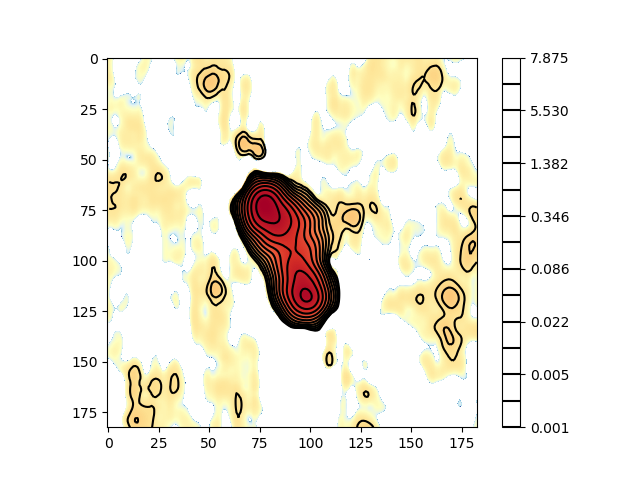

In [63]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(nvss_data_reshape2, cmap='RdYlBu_r', norm=LogNorm(),interpolation='bilinear')
plt.contour(nvss_data_reshape1, levs_np, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('nvss_final.png')

## TGSS-ADR image

In [64]:
from astropy.io import fits
tgss = fits.open('tgss.FITS')
tgss

In [65]:
tgss.info()

Filename: tgss.FITS
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   (145, 147, 1, 1)   float32   


In [66]:
tgss[0]

In [67]:
tgss[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  145                                                  
NAXIS2  =                  147                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'R12D40  '           /Source name                                     
TELESCOP= 'GMRT    '           /                                                
INSTRUME= '153MHZ  '           /                                                
OBSERVER= 'TGSS    '           /                                                
DATE-OBS= '2016-03-15'      

In [68]:
tgss_data = tgss[0].data
tgss_data

array([[[[ 0.01297904,  0.01039764,  0.00722382, ..., -0.00206061,
          -0.00040908,  0.00342336],
         [ 0.01249284,  0.01017758,  0.0067696 , ...,  0.00014668,
           0.00193642,  0.00535048],
         [ 0.01159293,  0.00973091,  0.00641127, ...,  0.00220528,
           0.00362335,  0.00599583],
         ...,
         [ 0.00906408,  0.0073412 ,  0.00437375, ..., -0.01405965,
          -0.01341639, -0.01099798],
         [ 0.01025794,  0.0091898 ,  0.00701237, ..., -0.00988408,
          -0.00990304, -0.00837065],
         [ 0.01047575,  0.01056446,  0.00962237, ..., -0.00590573,
          -0.00645281, -0.00582368]]]], dtype=float32)

In [69]:
type(tgss_data)

numpy.ndarray

In [70]:
tgss_data.shape

(1, 1, 147, 145)

In [71]:
tgss_data.dtype.name

'float32'

In [72]:
print('Min:', np.min(tgss_data))
print('Max:', np.max(tgss_data))
print('Mean:', np.mean(tgss_data))
print('Stdev:', np.std(tgss_data))

Min: -0.031031925
Max: 5.04521
Mean: 0.043509208
Stdev: 0.29308367


In [73]:
tgss_data_reshape2 = tgss_data.reshape(147, 145)
#data_reshape2 = data_reshape1

In [74]:
tgss_data_reshape3 = tgss_data_reshape2[::-1,:]
print(tgss_data_reshape3)

[[ 0.01047575  0.01056446  0.00962237 ... -0.00590573 -0.00645281
  -0.00582368]
 [ 0.01025794  0.0091898   0.00701237 ... -0.00988408 -0.00990304
  -0.00837065]
 [ 0.00906408  0.0073412   0.00437375 ... -0.01405965 -0.01341639
  -0.01099798]
 ...
 [ 0.01159293  0.00973091  0.00641127 ...  0.00220528  0.00362335
   0.00599583]
 [ 0.01249284  0.01017758  0.0067696  ...  0.00014668  0.00193642
   0.00535048]
 [ 0.01297904  0.01039764  0.00722382 ... -0.00206061 -0.00040908
   0.00342336]]


<IPython.core.display.Javascript object>


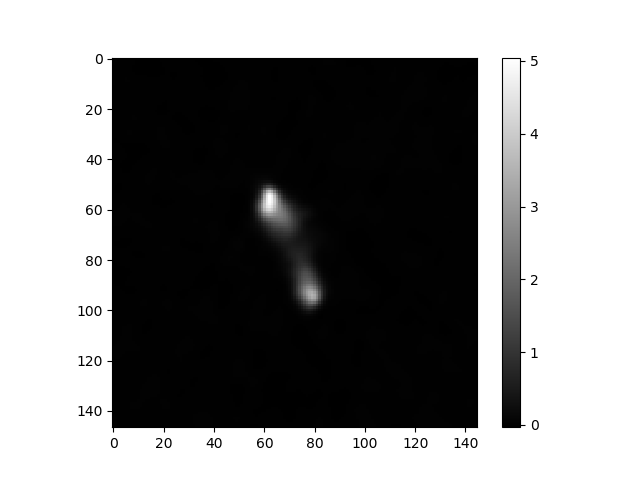

In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(tgss_data_reshape3, cmap='gray')
plt.colorbar()

<IPython.core.display.Javascript object>


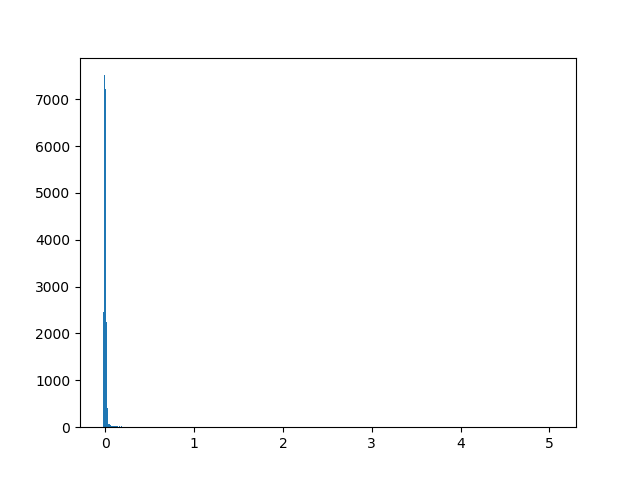

In [77]:
histogram = plt.hist(tgss_data_reshape3.flat, bins=500)

<IPython.core.display.Javascript object>


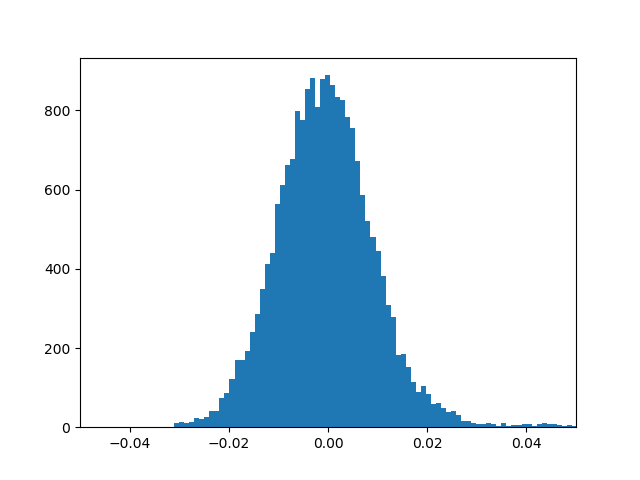

In [78]:
#We can see most values distributed around 0
plt.xlim(-0.05,0.05)
histogram = plt.hist(tgss_data_reshape3.flat, bins=5000)

In [79]:
import numpy as np
rms_tgss = 12E-3
levs = [3.00, 4.24, 6.00, 8.49, 12.00, 16.97, 24.00, 33.94, 48.00, 67.88, 96.00, 135.76, 192.00, 271.53, 384.00]
levs_np = np.array(levs)
levs_np_tgss = rms_tgss*levs_np
levs_np_tgss

array([0.036  , 0.05088, 0.072  , 0.10188, 0.144  , 0.20364, 0.288  ,
       0.40728, 0.576  , 0.81456, 1.152  , 1.62912, 2.304  , 3.25836,
       4.608  ])

<IPython.core.display.Javascript object>


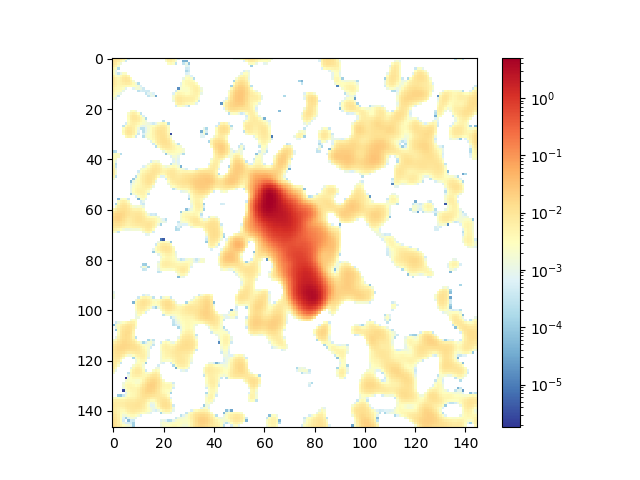

In [80]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(tgss_data_reshape3, cmap='RdYlBu_r', norm=LogNorm())
#plt.contour(data1_reshape1, levs_np_ugmrt, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('tgss_colorscale.png')

<IPython.core.display.Javascript object>


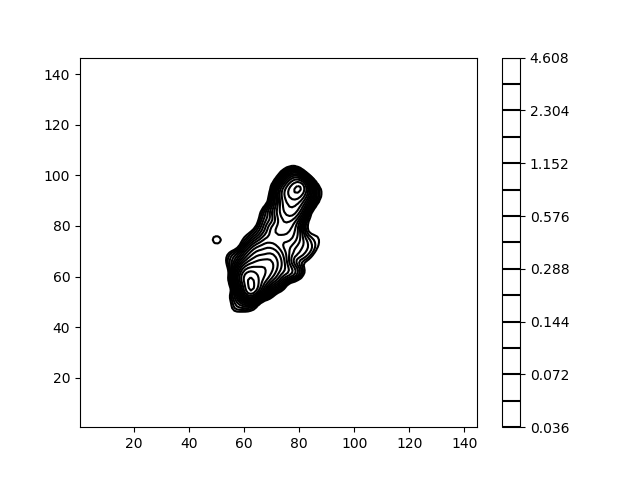

In [81]:
from matplotlib.colors import LogNorm
from matplotlib import cm

#plt.imshow(data1_reshape2, cmap='RdYlBu_r', norm=LogNorm(),vmin=12E-3,vmax=1)
plt.contour(tgss_data_reshape2, levs_np_tgss, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('tgss_contour.png')

<IPython.core.display.Javascript object>


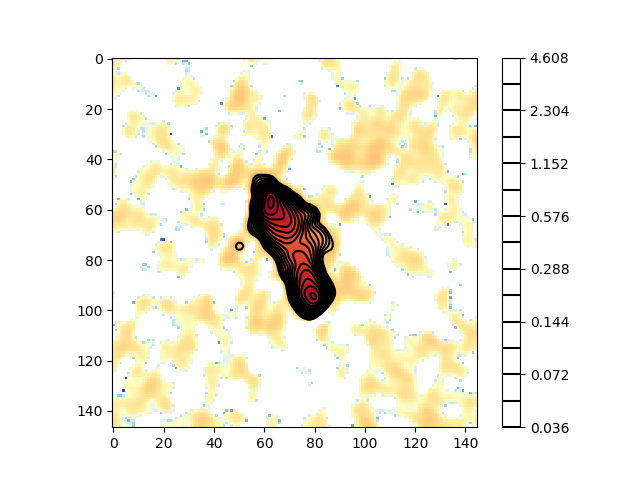

In [82]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(tgss_data_reshape3, cmap='RdYlBu_r', norm=LogNorm())
plt.contour(tgss_data_reshape2, levs_np_tgss, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('tgss_final.png')

In [40]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)
    Display an image, i.e. data on a 2D regular raster.
    
    Parameters
    ----------
    X : array-like or PIL image
        The image data. Supported array shapes are:
    
        - (M, N): an image with scalar data. The data is visualized
          using a colormap.
        - (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
        - (M, N, 4): an image with RGBA values (0-1 float or 0-255 int),
          i.e. including transparency.
    
        The first two dimensions (M, N) define the rows and columns of
        the image.
    
        Out-of-range RGB(A) values are clipped.
    
    cmap : str or `~matplotlib.colors.Colormap`, optional
        The 

# FITS handling with APLpy

In [83]:
import aplpy

INFO: Setting slices=[0, 0] [aplpy.core]


<IPython.core.display.Javascript object>


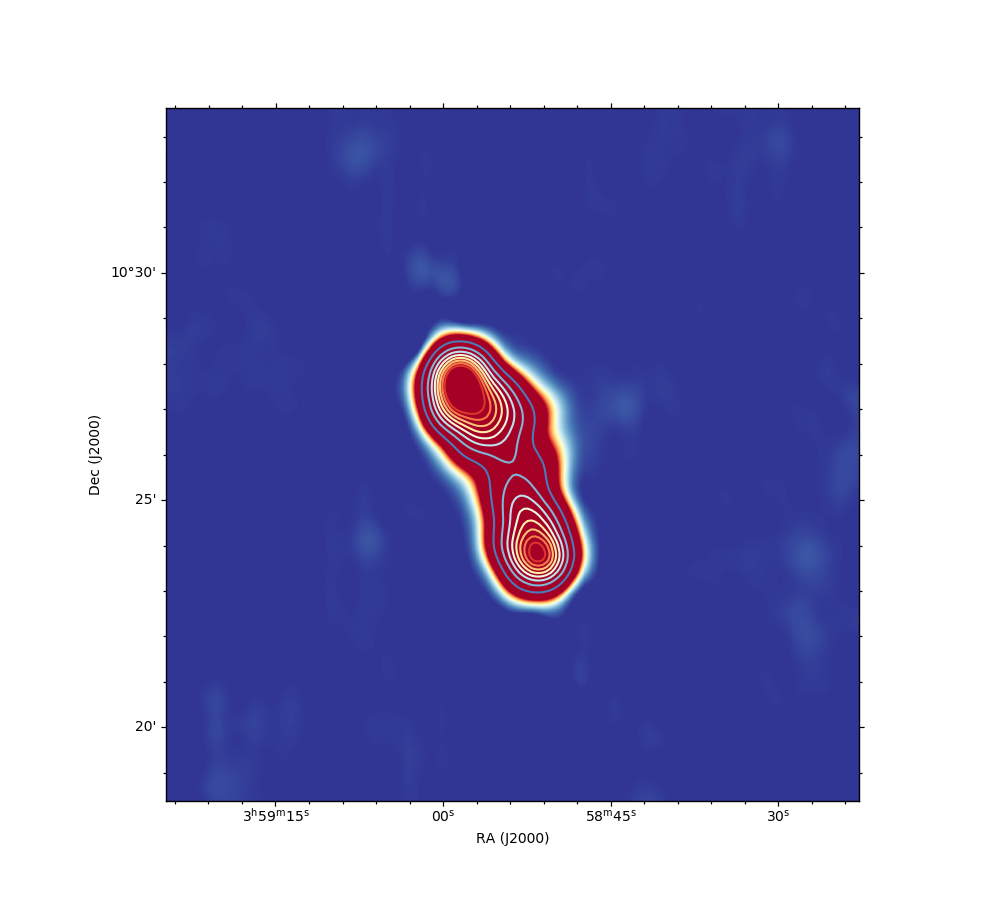

In [86]:
#nvss
import aplpy
%matplotlib notebook
f1 = aplpy.FITSFigure('nvss.fits')
'''
f1.add_beam()
beam.set_major(0.03) # degrees
beam.set_minor(0.02) # degrees
beam.set_angle(45.0) # degrees
f1.beam.set_color('white')
f1.beam.set_hatch('+')

f1.beam.show()
'''
#f1
#show_ellipses(xw, yw, width, height, angle=0, layer=False, zorder=None, **kwargs)
f1.show_contour(nvss_data_reshape1,levels=10, colors=None,kernel='gauss', cmap='RdYlBu_r')
f1.show_colorscale(cmap='RdYlBu_r',vmin=0.45E-3,vmax=0.07,interpolation='bilinear')
#gc.add_scalebar(0.03, '0.5pc', color='white')

# Calculating the mean stack

### Question 1.
Write a load_fits function that loads in a FITS file and finds the position of the brightest pixel (i.e. the maximum value) in its image data. To make this function work for arbitrary files, pass the name of the FITS file as an argument to the function.

```
Using the file image1.fits from the previous examples, your program should work like this:

load_fits('image1.fits')
(150, 149)

```

##### Hint !
1. If you are unsure how to do this problem, take a look at NumPy's [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html#numpy.argmax) function. 
2. A short way of solving this problem is to make this function work on a 2D array.

<IPython.core.display.Javascript object>


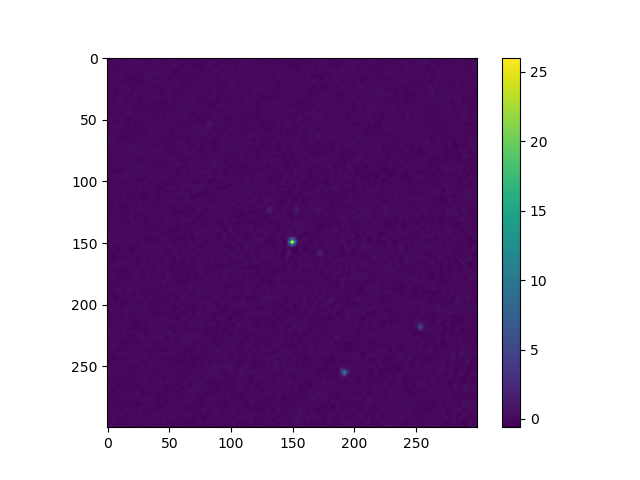

In [15]:
from astropy.io import fits
data = fits.open('image1.fits')
fits_data = data[0].data
plt.imshow(fits_data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


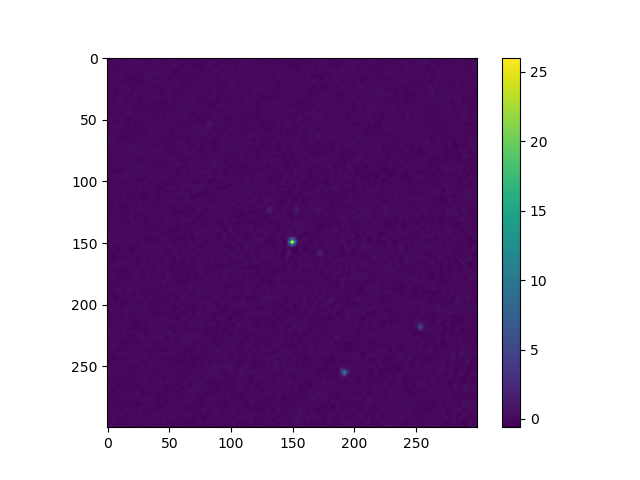

(150, 149)


In [12]:
# Write your load_fits function here.
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

def load_fits(fits_file):
    data = fits.open(fits_file)
    fits_data = data[0].data
    max_pos = np.unravel_index(np.argmax(fits_data), fits_data.shape)
    # Plot the 2D image data
    plt.imshow(fits_data.T, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()
    return max_pos


if __name__ == '__main__':
  # Run your `load_fits` function with examples:
    bright = load_fits('image1.fits')
    print(bright)

### Question 2.

Write a mean_fits function that takes a list of FITS files as an argument, reads them in, and returns the mean image data of the FITS files. All the images have the same dimensions and your calculated mean array should match those dimensions.

Your function should be able to process an arbitrary number of files. If you're unsure how to do that, take a look at the sample solutions to the previous problems as long as previous exercises.

The mean stack of these files will be a large 300 x 300 array, so we will only look at the central value of your returned array, which is where we expect the radio galaxy to be.

```
Using all the FITS files provided (images 0 to 6), your program should work like this:

mean_fits(['image1.fits', 'image2.fits', 'image3.fits','image4.fits','image5.fits','image6.fits'])
16.037872 at postion (150, 150)
```

16.037872
(150, 150)


<IPython.core.display.Javascript object>


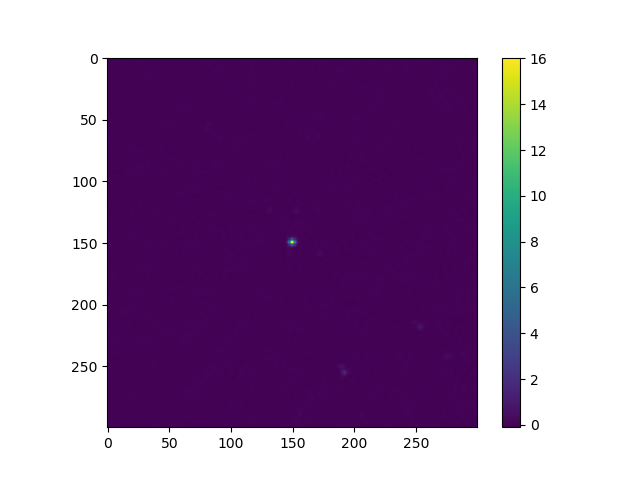

In [16]:
# Write your mean_fits function here:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

def mean_fits(x):
  n = len(x)
  #print(n)
  if n > 0:
    data = fits.open(x[0])
    fits_data = data[0].data
    #print(fits_data[100,100])
    for i in range(1,n):
      data = fits.open(x[i])
      fits_data += data[0].data
      #print(fits_data[100,100])
    data_mean = fits_data/n
    #print(data_mean)
    return data_mean
    
if __name__ == '__main__':
    # Test your function with examples from the question
    data_total  = mean_fits(['image1.fits', 'image2.fits', 'image3.fits','image4.fits','image5.fits','image6.fits'])
    print(data_total[150, 150])
    max_pos = np.unravel_index(np.argmax(data_total),data_total.shape)
    print(max_pos)

# You can also plot the result:
import matplotlib.pyplot as plt
plt.imshow(data_total.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()